<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Exercise_Logistic_Regression_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 **Exercise: Logistic Regression**

## 🎯 Learning Objectives
- Predict whether Titanic passengers survived or not based on personal information
- Apply Logistic Regression as a binary classification method
- Evaluate models using classification metrics
- Interpret logistic regression coefficients

## **Context**

**Introduction to logistic regression**

Logistic Regression is used to predict the probability of a binary event occurring, such as survival or failure.

Logistic regression formula:
$$ P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \ldots + \beta_nX_n)}} $$

**Use the 'titanic' dataset from seaborn.**

- Target = survived (0 = Not survived, 1 = survived)
- Features
  - `Pclass`: Ticket class
  - `Sex`: Gender
  - `Age`: Age
  - `Fare`: Ticket price
  - `Embarked`: Port of embarkation

- Fill in missing values ​​if any
- Perform modeling with Logistic Regression
- Check for multicollinearity
- Interpret the summary results

**Initial setup**

In [1]:
# Importing libraris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# encoding
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import RobustScaler

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## **Data Understanding**

In [2]:
# Loading dataset
data = sns.load_dataset('titanic')
print(f'Number of rows and columns: {data.shape}')
data.head()

Number of rows and columns: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Overall, We have 891 rows and 15 columns in the dataset. However, for this study purpose we will use only 4 features ('pclass', 'sex', 'age', 'fare') and a target ('survived').

In [3]:
# Loading dataset
data = data[['pclass', 'sex', 'age', 'fare', 'survived']]
print(f'Number of rows and columns: {data.shape}')
data.head()

Number of rows and columns: (891, 5)


,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [4]:
# Data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   fare      891 non-null    float64
 4   survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


**Insight**
- The dataset describes 891 individuals.
- Each row represents information/characteristics of an individual, such as age, gender, class, and other information, along with survival information.

**Attribute Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
| pclass | Integer | Social Class |
| age | Integer | Age |
| sex | Text | Gender |
| fare | Float | Cost |
| survived | Text | Income Category |

**Initial Assesment**

In [5]:
# Check the data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,pclass,int64,0.00000,False,3,"[3, 1, 2]"
1,sex,object,0.00000,False,2,"[male, female]"
2,age,float64,19.86532,False,88,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
3,fare,float64,0.00000,False,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
4,survived,int64,0.00000,False,2,"[0, 1]"


**Descriptive Statistics**

In [6]:
display(data.describe(), data.describe(include='object'))

,pclass,age,fare,survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


,sex
count,891
unique,2
top,male
freq,577


**Insight**

- The dataset consists of 891 rows and 5 columns.
- Numeric variables: pclass, age, fare
- Categorical variables: sex, survived
- Age has a range of 0.42 - 80
- Fare has a range of 0 - 512.33

### **Exploratory Data Analysis (EDA)**

#### `Numerical Features`

**Data Distribution**

In [7]:
numerical = [var for var in data.columns if data[var].dtypes in ['int64', 'float64']]
#numerical.remove('survived') # Remove target variable

In [8]:
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,pclass,1437.109000,0.000000e+00,Not Normally Distributed
1,age,18.105033,1.170960e-04,Not Normally Distributed
2,fare,904.587271,3.727091e-197,Not Normally Distributed
3,survived,4070.917079,0.000000e+00,Not Normally Distributed


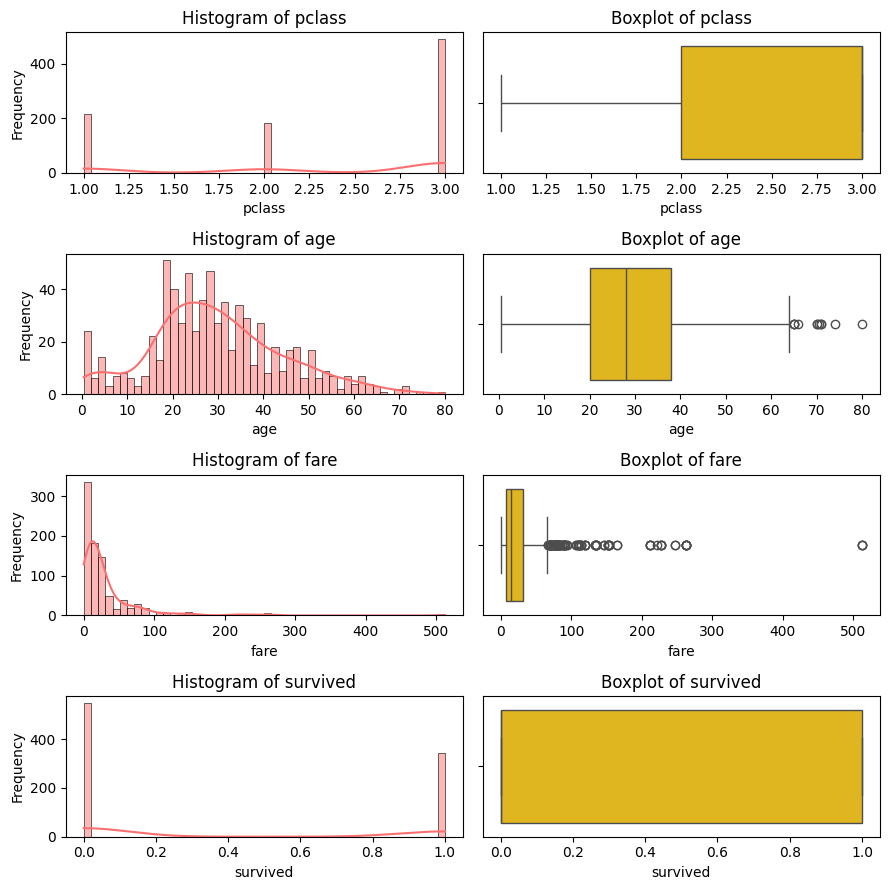

In [9]:
# Data distribution

plt.figure(figsize=(9, 9))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Correlation**

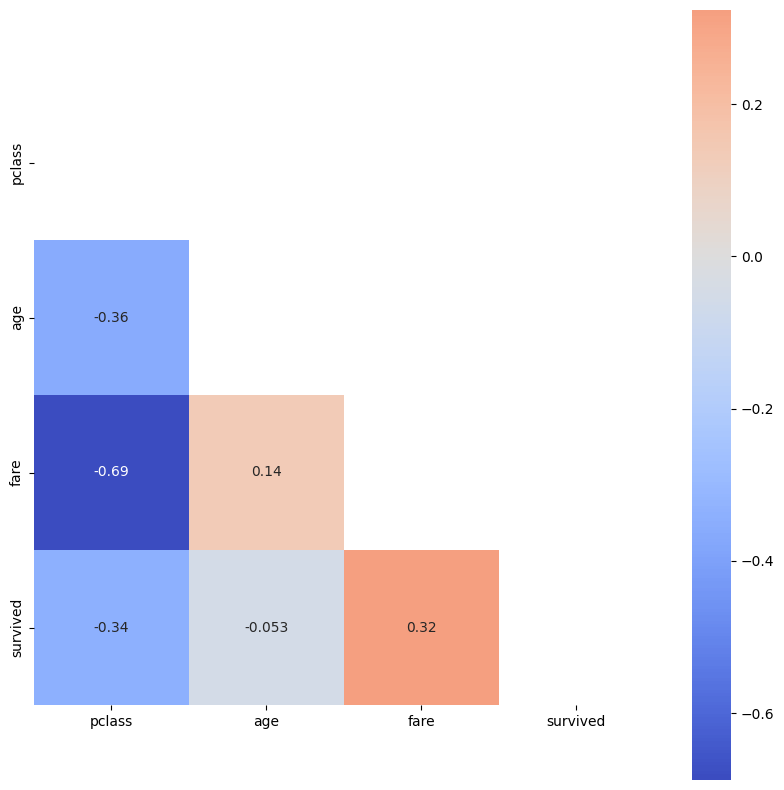

In [10]:
plt.figure(figsize=(10,10))

numerical_data = data[numerical] # Use the previously defined list of numerical column names
matrix = np.triu(numerical_data.corr(method='spearman'))

sns.heatmap(data=numerical_data.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

**Feature vs Target**

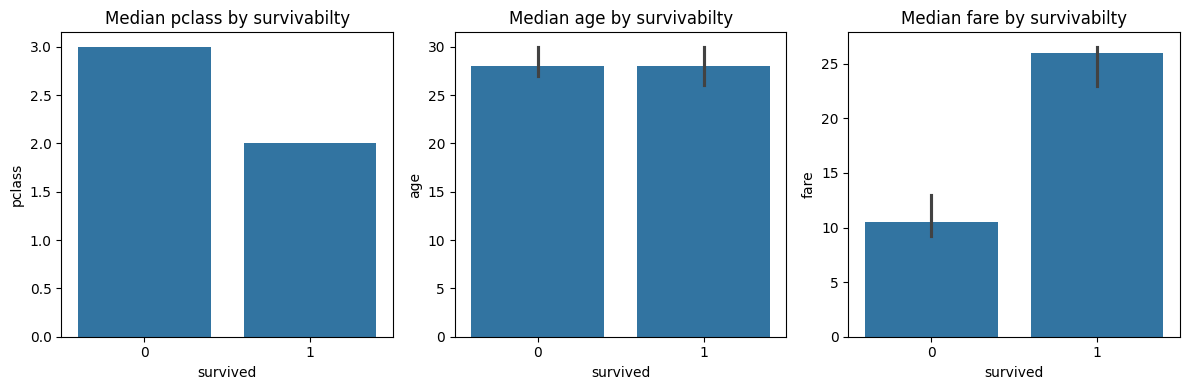

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

for col, j in zip(numerical, axes.flatten()):
    ax = sns.barplot(data=data, y= col, x='survived', estimator=np.median, ax= j)
    ax.set_title(f'Median {col} by survivabilty')

plt.tight_layout()
plt.show()

#### `Categorical Features`

**Distribution**

In [12]:
categorical = [var for var in data.columns if data[var].dtypes == 'object']

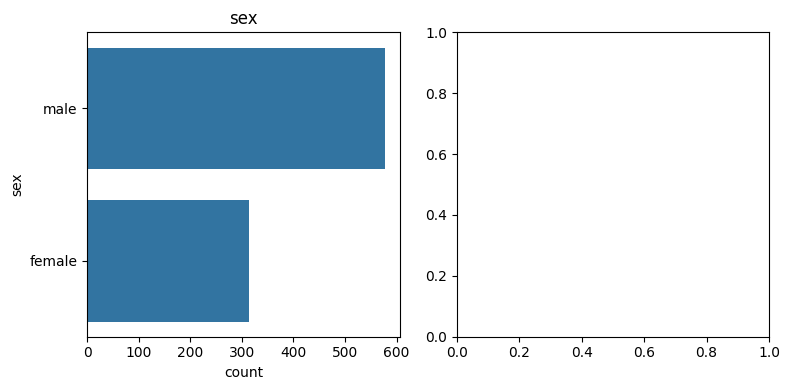

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12)

plt.tight_layout()
plt.show()

**Feature vs Target**

In [14]:
def create_plot(data, col):

    agg_table = data.groupby([col, 'survived']).size().unstack().reset_index()
    agg_table['total'] = agg_table[1]+agg_table[0]
    agg_table['% survived'] = (agg_table[1]/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% survived', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% survived', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of survived passengers by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='survived', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of passengers by {col} and survived')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0,25000)

    plt.tight_layout()
    plt.show()

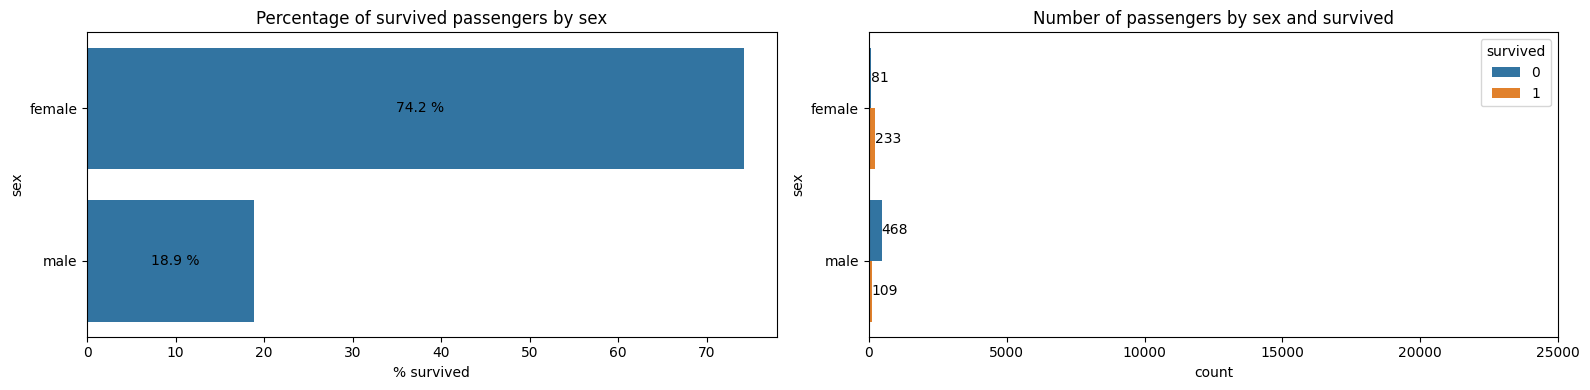

In [15]:
create_plot(data, 'sex')

### **Data Preprocessing**

#### `Duplicates`

In [16]:
print(f"Total duplicated data: {data[data.duplicated()].shape}")
print(f'Percentage of duplicated data {len(data[data.duplicated()])/len(data)*100:.2f}%')

Total duplicated data: (123, 5)
Percentage of duplicated data 13.80%


Handling duplicated data

In [17]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

#### `Missing Values`

In [18]:
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,Missing values
pclass,0
sex,0
age,98
fare,0
survived,0


There is a missing value in the age column.

#### `Imbalance Data`

In [19]:
# Check the class distribution
from collections import Counter

print("Class distribution:", Counter(data['survived']))

Class distribution: Counter({0: 449, 1: 319})


In [20]:
data['survived'].value_counts(normalize=True)

,proportion
survived,
0,0.584635
1,0.415365


The target class `survived` proportion can still be categorized as balanced.

#### `Outliers`

In [21]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.drop(columns='survived').columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,pclass,0,0.00,-2.0000,6.0000
1,age,7,0.91,-8.5000,67.5000
2,fare,97,12.63,-31.4375,73.8625


There are outliers in the numerical column with percentages ranging from 0% to 12.63%. We will examine the proportion of targets in these outlier data.

In [22]:
proportion = []
indeces = []

for i, row in outlier_df.iterrows():
    outlier = data[(data[row['Column']] < row['Lower Bound']) | (data[row['Column']] > row['Upper Bound'])]
    percentages = (outlier['survived'].value_counts(normalize=True)*100).values
    proportion.append(percentages)
    indeces.append(row['Column'])

pd.DataFrame(proportion, columns=['Not Survived', 'Survived'], index=indeces)

,Not Survived,Survived
pclass,NaN,NaN
age,85.714286,14.285714
fare,76.288660,23.711340


We find that the outliers in the 'age' and 'fare' columns have different proportions of 'Not Survived' and 'Survived' in the 'survived' column compared to the rest of the data. Therefore, we won't remove these outliers because they contain information that impacts the target.

#### `Collinearity`

In [23]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

We will carry out repeated testing until we obtain a VIF value < 10.

In [24]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [25]:
vif_df

,Feature,VIF
1,age,3.149613
0,pclass,2.581941
2,fare,1.410650


In [26]:
dropped_columns

[]

There is no multicollinearity

#### `Cardinality`

In [27]:
categorical = [var for var in data.columns if data[var].dtypes == 'object']

In [28]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of sex: 2


#### `Feature Engineering`

**Encoding**

We'll Convert the `sex` feature/column using One Hot Encoding, as this feature is non-ordinal and contains only a small number of unique data points. We will perform encoding when we build the pipeline.

### **Modeling**

**Define Features (X) and Target (y)**

In [29]:
# feature
X = data.drop(columns='survived')

# target
y = data['survived']

**Data Splitting**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

**Pipeline**

| Technique | Action |
| ----------------------------- | ----------- |
| Iterative Imputer | Fills missing values ​​in the `age` column based on the `fare` and `pclass` features |
| One Hot Encoding | Transforms the `sex` column with unique values ​​<= 10 |

In [31]:
# Encoding and Imputer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex']),
    ('iterative_imputer', IterativeImputer(random_state=42), ['age', 'pclass', 'fare']),
], remainder='passthrough')

In [32]:
# .fit
transformer.fit(X_train)

# .transform method
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

`Get Col Names`

In [33]:
col_names = list(transformer.transformers_[0][1].get_feature_names_out()) + \
    list(transformer.transformers_[1][2])

col_names

['sex_male', 'age', 'pclass', 'fare']

In [34]:
X_train_prep = pd.DataFrame(data=X_train_prep, columns=col_names)
X_train_prep.head()

,sex_male,age,pclass,fare
0,1.0,8.0,2.0,36.750
1,1.0,18.0,3.0,7.775
2,1.0,27.0,1.0,53.100
3,1.0,1.0,3.0,20.575
4,1.0,57.0,2.0,12.350


In [35]:
X_test_prep = pd.DataFrame(data=X_test_prep, columns=col_names)
X_test_prep.head()

,sex_male,age,pclass,fare
0,1.0,24.776716,3.0,6.8583
1,0.0,24.000000,2.0,18.7500
2,0.0,47.000000,1.0,52.5542
3,0.0,38.954683,1.0,55.0000
4,1.0,26.000000,3.0,8.0500


### `Model Experiment`

**Estimating Coefficients**

In [37]:
sm_logit = sm.Logit(y_train.reset_index(drop=True), sm.add_constant(X_train_prep))
result = sm_logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.461246
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Wed, 17 Sep 2025   Pseudo R-squ.:                  0.3210
Time:                        01:57:08   Log-Likelihood:                -283.20
converged:                       True   LL-Null:                       -417.08
Covariance Type:            nonrobust   LLR p-value:                 9.738e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9728      0.634      7.849      0.000       3.731       6.214
sex_male      -2.4682      0.

We will try to interpret it

In [38]:
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9728      0.634      7.849      0.000       3.731       6.214
sex_male      -2.4682      0.224    -10.999      0.000      -2.908      -2.028
age           -0.0371      0.009     -4.201      0.000      -0.054      -0.020
pclass        -1.2630      0.169     -7.466      0.000      -1.595      -0.931
fare           0.0014      0.002      0.598      0.550      -0.003       0.006


**P>|z| (Wald Test)**

- **const** = 0.000. p-value < 0.05, reject Ho. The model requires an intercept.
- **sex_male** = 0.000. p-value < 0.05, reject Ho. `sex_male` has a significant effect on the target (default risk).
- **age** = 0.000. p-value < 0.05, reject Ho. `age` has a significant effect on the target (default risk).
- **pclass** = 0.000. p-value < 0.05, reject Ho. `pclass` has a significant effect on the target (default risk).
- **fare** = 0.550. p-value > 0.05, fail to reject Ho. `fare` does not have a significant effect on the target (default risk).

**Odd Ratio (OR)**

In [39]:
X.describe().loc[['min', 'max']]

,pclass,age,fare
min,1.0,0.42,0.0000
max,3.0,80.00,512.3292


`pclass`

In [44]:
c = 3
a = 1
Beta = -1.2630

OR_pclass = np.exp(Beta*(c-a))
print('Odd ratio pclass:', OR_pclass)

Odd ratio pclass: 0.07997829448975051


- The lower the passenger's social status (the higher the pclass value), the lower their chance of survival (the probability of being in class 1 becomes smaller).
- For class 3 passengers, the chance of survival is 0.080 times that of class 1 passengers.

`age`

In [45]:
c = 30
a = 20
Beta = -0.0371

OR_age = np.exp(Beta*(c-a))
print('Odd ratio age:', OR_age)


Odd ratio age: 0.690043941558789


- The older the person (the higher the age value), the lower the chance of survival (the probability of being in class 1 becomes smaller).
- A 30-year-old passenger has a 0.69 times greater chance of survival than a 20-year-old passenger.

`sex_male`

In [46]:
c = 1
a = 0
Beta = -2.4682

OR_male = np.exp(Beta*(c-a))
print('Odd ratio male', OR_male)

Odd ratio male 0.0847372488574926


- A man (the higher the sex_male value), the lower the chance of survival (the probability of class 1 becomes smaller).
- A male passenger has a 0.085 times greater chance of survival than a female passenger.

**Evaluating the Model**

In [47]:
# display result
print(result.summary().tables[0])

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Wed, 17 Sep 2025   Pseudo R-squ.:                  0.3210
Time:                        02:04:55   Log-Likelihood:                -283.20
converged:                       True   LL-Null:                       -417.08
Covariance Type:            nonrobust   LLR p-value:                 9.738e-57


**Log Likelihood Ratio (LLR) Test**

- `Ho`: $\beta_1$ = $\beta_2$ = $\beta_3$ = $\beta_4$ = ..... = 0
- `Ha` : Not all coefficients ($\beta_i$) have a value of 0 (At least one of the $\beta_i$ values ​​is not 0)
- $\alpha$: 0.05
- `LLR p-value` = 9.738e-57 < 0.05, reject Ho. There is at least 1 feature that has a significant effect on the target

**Model Limitations**

This model is only valid for the data range used in this modeling, namely:

* `age` between 0.42 and 80 years
* `pclass` between 1 and 3
* `sex` in the form of 'male' and 'female'

In this case, the analysis and prediction results of the model created are invalid for:
* `age` greater than 80 years or less than 0.42 years
* `pclass` other than 1, 2, and 3
* `sex` types other than 'male' and 'female'
.

**Accuracy**

In [48]:
from sklearn.metrics import accuracy_score

y_predict_proba = result.predict(sm.add_constant(X_test_prep))
y_predict_proba

,0
0,0.100303
1,0.829543
2,0.884804
3,0.912173
4,0.096425
...,...
149,0.788065
150,0.102284
151,0.106538
152,0.594199


In [49]:
y_predict_class = np.where(y_predict_proba > 0.5, 1, 0)

print('Model accuracy on test set data:', accuracy_score(y_test, y_predict_class))

Model accuracy on test set data: 0.7402597402597403


**Predict to New Data**

In [50]:
X_train


,pclass,sex,age,fare
452,2,male,8.0,36.750
561,3,male,18.0,7.775
609,1,male,27.0,53.100
668,3,male,1.0,20.575
520,2,male,57.0,12.350
...,...,...,...,...
91,3,male,70.5,7.750
707,1,female,62.0,80.000
630,1,male,19.0,53.100
323,3,female,24.0,16.700


In [51]:
new_data = pd.DataFrame({
    'pclass' : [1, 1, 1, 3, 3, 1],
    'sex' : ['male', 'male', 'male', 'female', 'female', 'female'],
    'age' : [5, 40, 80, 5, 40, 80],
    'fare': [25, 50, 100, 25, 50, 100]
})

new_data

,pclass,sex,age,fare
0,1,male,5,25
1,1,male,40,50
2,1,male,80,100
3,3,female,5,25
4,3,female,40,50
5,1,female,80,100


In [52]:
# example of predicting new data
result.predict(sm.add_constant(transformer.transform(new_data))).round(2)

array([0.75, 0.46, 0.17, 0.74, 0.44, 0.71])